In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [11]:
# Parameters
lambda_walk = 1.5  # Average rate of walking arrivals
bus_interval = 30  # Time interval between bus arrivals
bus_capacity = 20  # Number of customers arriving by bus
total_festival_goer = 200
festival_goer = 0
simulation_time = 1000  # Total simulation time steps


while festival_goer < total_festival_goer:
    walking_arrivals = walking_interarrival_time = np.random.poisson(lambda_walk)
    print(walking_arrivals)
    festival_goer += 1

bus_arrivals = np.arange(0, 1000, bus_interval)  # Generate bus arrival times




0
0
1
0
2
0
3
1
1
1
4
2
4
2
2
2
2
3
3
0
1
5
3
6
2
1
1
1
5
4
3
2
1
2
0
1
1
2
2
1
3
1
2
1
2
1
2
2
4
1
3
2
2
1
0
4
2
1
1
0
2
1
2
2
2
2
1
0
1
2
2
2
1
5
2
1
2
4
2
0
0
1
0
3
3
2
0
2
2
1
0
4
0
0
0
3
3
1
3
1
0
1
2
0
1
1
0
1
0
3
1
2
0
1
2
3
0
0
1
3
1
1
0
3
3
3
0
2
2
1
3
0
2
1
2
4
4
1
0
3
0
0
1
2
0
3
3
1
2
1
1
0
1
2
2
2
1
1
2
2
0
2
1
4
0
4
1
4
2
2
1
1
0
3
1
1
0
0
0
1
0
0
0
0
1
0
1
3
1
1
5
2
1
2
2
2
3
0
0
3


In [9]:
# Plot arrivals
plt.figure(figsize=(10, 6))
plt.plot(walking_arrivals, np.arange(len(walking_arrivals)), 'bo', label='Walking Arrivals')
for arrival_time in bus_arrivals:
    plt.axvline(x=arrival_time, color='r', linestyle='--', label='Bus Arrival')
plt.xlabel('Simulation Time Step')
plt.ylabel('Number of Arrivals')
plt.title('Arrivals of Customers by Walking and Bus')
plt.legend()
plt.grid(True)
plt.show()


TypeError: object of type 'int' has no len()

<Figure size 720x432 with 0 Axes>

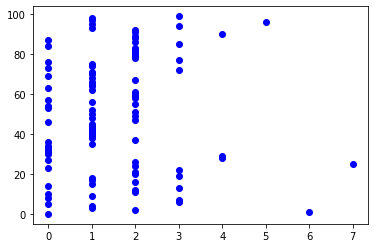

In [14]:
walking_arrivals = []
for i in range(0,100):
    arrival = np.random.poisson(lambda_walk)
    walking_arrivals.append(arrival)


plt.plot(walking_arrivals, np.arange(len(walking_arrivals)), 'bo', label='Walking Arrivals')
plt.show()

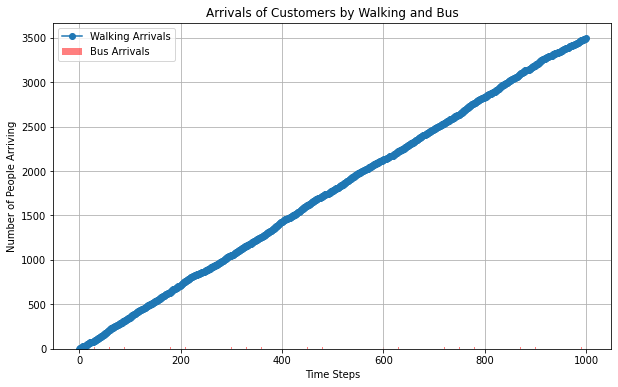

In [15]:

# Parameters
lambda_walk = 1.5  # Average rate of walking arrivals
bus_interval = 30  # Time interval between bus arrivals
bus_capacity = 20  # Number of customers arriving by bus
simulation_time = 1000  # Total simulation time steps

# Generate walking arrivals
walking_arrivals = np.random.poisson(lambda_walk, simulation_time)
group_sizes = np.random.normal(4, 2, simulation_time).astype(int)  # Generate group sizes for walking arrivals

# Generate bus arrivals
bus_arrivals = np.zeros(simulation_time)
bus_arrivals[::bus_interval] = bus_capacity  # Set 20 customers arriving every 30 time steps

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(group_sizes), label='Walking Arrivals', linestyle='-', marker='o')
plt.bar(np.arange(simulation_time), bus_arrivals, width=1, color='r', alpha=0.5, label='Bus Arrivals')
plt.xlabel('Time Steps')
plt.ylabel('Number of People Arriving')
plt.title('Arrivals of Customers by Walking and Bus')
plt.legend()
plt.grid(True)
plt.show()

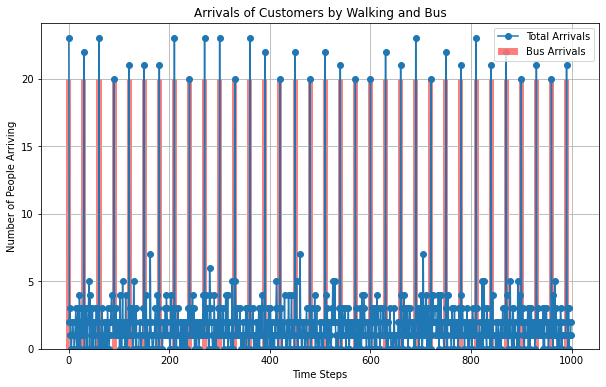

In [18]:
# Parameters
lambda_walk = 1.5  # Average rate of walking arrivals
bus_interval = 30  # Time interval between bus arrivals
bus_capacity = 20  # Number of customers arriving by bus
simulation_time = 1000  # Total simulation time steps

# Generate walking arrivals
walking_arrivals = np.random.poisson(lambda_walk, simulation_time)
group_sizes = np.random.normal(4, 2, simulation_time).astype(int)  # Generate group sizes for walking arrivals

# Generate bus arrivals
bus_arrivals = np.zeros(simulation_time)
bus_arrivals[::bus_interval] = bus_capacity  # Set 20 customers arriving every 30 time steps

# Calculate the number of people arriving at each time step
total_arrivals = walking_arrivals + bus_arrivals

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(simulation_time), total_arrivals, label='Total Arrivals', linestyle='-', marker='o')
plt.bar(np.arange(simulation_time), bus_arrivals, width=10, color='r', alpha=0.5, label='Bus Arrivals')
plt.xlabel('Time Steps')
plt.ylabel('Number of People Arriving')
plt.title('Arrivals of Customers by Walking and Bus')
plt.legend()
plt.grid(True)
plt.show()

In [29]:

# Parameters
lambda_walk = 1.5  # Average rate of walking arrivals
bus_interval = 30  # Time interval between bus arrivals
bus_capacity = 20  # Number of customers arriving by bus
max_people = 200  # Maximum number of people allowed
simulation_time = 1000  # Total simulation time steps

# Initialize variables
total_arrivals = np.zeros(simulation_time)

# Generate arrivals
time_step = 0
while np.sum(total_arrivals) < max_people and time_step < simulation_time:
    walking_arrivals = np.random.poisson(lambda_walk)
    group_sizes = np.random.normal(4, 2, simulation_time).astype(int)
    #group_size = np.random.normal(4.0, 2.0).astype(int)
    if np.sum(total_arrivals) + walking_arrivals + bus_capacity > max_people:
        walking_arrivals = max_people - np.sum(total_arrivals) - bus_capacity
    if walking_arrivals > 0:
        total_arrivals[time_step:min(time_step+walking_arrivals, simulation_time)] += 1
    time_step += 1
    if time_step % bus_interval == 0:
        if np.sum(total_arrivals) + bus_capacity > max_people:
            bus_capacity = max_people - np.sum(total_arrivals)
        total_arrivals[time_step:min(time_step+bus_capacity, simulation_time)] += 1
        time_step += 1

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(simulation_time), total_arrivals, label='Total Arrivals', linestyle='-', marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Number of People Arriving')
plt.title('Arrivals of Customers by Walking and Bus')
plt.legend()
plt.grid(True)
plt.show()


TypeError: slice indices must be integers or None or have an __index__ method

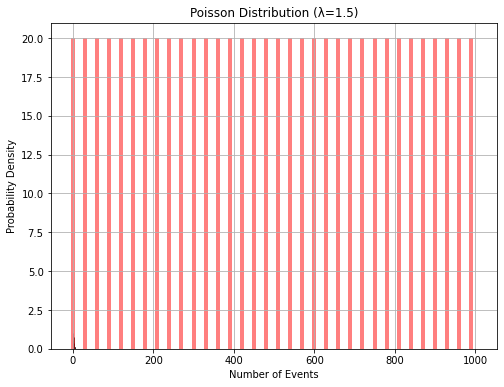

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_val = 1.5  # Lambda parameter for the Poisson distribution

# Generate Poisson distribution
data = np.random.poisson(lambda_val, 1000)

bus_arrivals = np.zeros(simulation_time)
bus_arrivals[::bus_interval] = 20  # Set 20 customers arriving every 30 time steps

# Plot
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.bar(np.arange(1000), bus_arrivals, width=10, color='r', alpha=0.5, label='Bus Arrivals')
plt.xlabel('Number of Events')
plt.ylabel('Probability Density')
plt.title(f'Poisson Distribution (λ={lambda_val})')
plt.grid(True)
plt.show()
